# Module 03

## Session 02 Supervised Learning Regression

## Linear Regression with Dummy Variables

### Import data

In [12]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Load data

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Dummy Variables

In [11]:
# variable
X = tips.drop(columns = ['tip'])
y = tips['tip']

# making dummies
X_dummies = pd.get_dummies(X, columns = ['sex', 'smoker', 'day', 'time'], drop_first = True)
X_dummies

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,1,1,0,0,1,1
1,10.34,3,0,1,0,0,1,1
2,21.01,3,0,1,0,0,1,1
3,23.68,2,0,1,0,0,1,1
4,24.59,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...
239,29.03,3,0,1,0,1,0,1
240,27.18,2,1,0,0,1,0,1
241,22.67,2,0,0,0,1,0,1
242,17.82,2,0,1,0,1,0,1


### Model

In [9]:
# add intercept to the formula
X_dummies = sm.add_constant(X_dummies) 

# defining the model
model = sm.OLS(y, X_dummies)

# fitting model
result = model.fit()

# print summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           1.20e-28
Time:                        19:09:58   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5908      0.256      2.310      

<b>Important output</b>:
1. <b>Adjusted R-square</b> 
2. <b>Prob (F-statistic)</b> (F-test)
3. <b>coef each variables</b> (β<sub>0</sub> ... β<sub>k</sub>) 
4. <b>prob each variables</b> (T-test from β<sub>0</sub> ... β<sub>k</sub>)

### Summary Interpretation:
Model: <b>y = 0.5908 + 0.0945X<sub>1</sub> + 0.1760X<sub>2</sub> + ... - 0.0681X<sub>8</sub></b>
> - X<sub>1</sub> = Total bill
> - X<sub>2</sub> = Size
>>  
> - X<sub>8</sub> = Dinner time
1. <b>Adjusted R-square</b>: the model can define 45.2% variation of tips
2. <b>Prob (F-statistic)</b>: 1.20e-28 < 0.05, then one or more variables are significantly affect the tips
3. <b>β<sub>0</sub>, β<sub>1</sub></b> ... <b>β<sub>8</sub></b>:
> - <b>β<sub>0</sub></b>: y when both x=0, tips when total bill = 0 and size = 0
> - <b>β<sub>1</sub></b>: Every 1 dollars total bill increase, then it will increase the tips approximately 0.0927 dollars
>>
> - <b>β<sub>8</sub></b>: The tips on Dinner 0.0681 dollars times larger than Lunch
4. <b>T-test</b>:
> - β<sub>0</sub> p-value: 0.022... < 0.05, then it confirm the model needs intercept
> - β<sub>1</sub> p-value: 0.000... < 0.05, then the correlation between total bill and tips are significant and the correlations are positive
>>
> - β<sub>8</sub> p-value: 0.878... > 0.05, then it confirm the correlation between size and tips are not significant and the correlations are negative

------------------

## Diagnostics

### 1. Normality Assumption

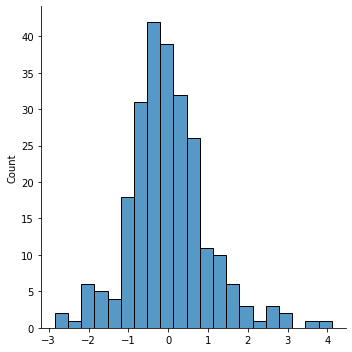

In [14]:
sns.displot(result.resid)

> The graph shows that we can assume the residual are <b>normally distributed</b>

-------------

### 2. Gauss-Markov Assumption

Text(0, 0.5, 'residual')

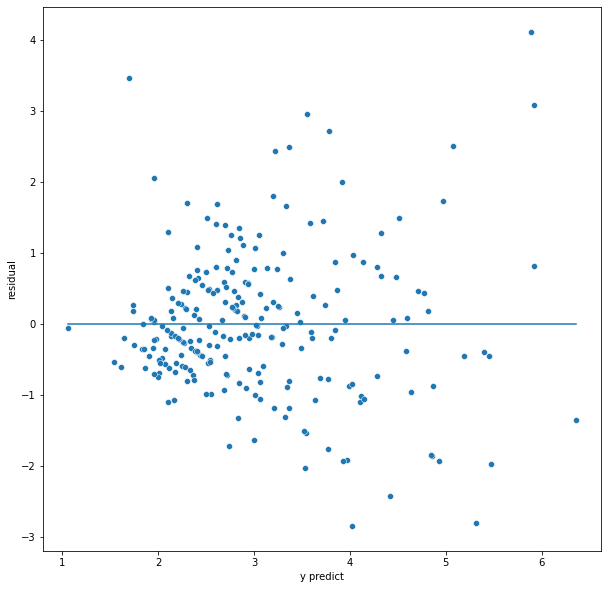

In [15]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=result.fittedvalues, y=result.resid)
sns.lineplot(x=result.fittedvalues, y=0)
plt.xlabel('y predict')
plt.ylabel('residual')

<b>Interpretation</b>:
1. Residual values swarm near the axis 0, we can assume the means error equal to 0
2. We did not see any pattern from the plot, so we can assume that the errors are not correlated
3. The graph indicated that the residual variance are gradually increased when y predict increased. So, we cannot assume that the variance are constant

We can conclude that the <b>Gauss-Markov Assumption</b> are <b>not accepted</b> only in point 3 because of <b>non-constant variance</b>

--------------------

### 3. Multicollinearity

In [16]:
def calc_vif(X):
    
    vif = pd.DataFrame()
    vif['variable'] = X.columns
    vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return vif

In [19]:
calc_vif(X_dummies)

,variable,vif
0,total_bill,9.443197
1,size,12.048233
2,sex_Female,1.479481
3,smoker_No,2.635550
4,day_Fri,2.559699
5,day_Sat,17.730443
6,day_Sun,15.810322
7,time_Dinner,33.150259


<b>Interpretation</b>:

- The results that indicated very high multicollinearity are size, day_sat, day_sun, and time_dinner because <b>vif are higher than 10</b>
- The results that indicated high multicollinearity are Total Bill because <b>vif are higher than 4</b>
- The results that indicated low multicollinearity are sex_female, smoker_no, and day_fri, because <b>vif are lower than 4</b>
 

-------------

### Diagnostic Summary:
1. <b>Normality accepted</b> means:
> <b>F-test</b> and <b>T-test</b> result on multi linear regression are <b>valid</b>
2. <b>Gauss-Markov Assumption</b>:
> - <i><b>Error term means accepted</b></i> means:
>> <b>No bias</b> in prediction result and regression parameter estimate (β)
> - <i><b>Uncorellated error accepted</b></i> means:
>> <b>R-square</b> is not overestimate and <b>p-value</b> is not underestimate, resulting both value are <b>unbiased</b>
> - <i><b>Constant variance unaccepted</b></i> means:
>> - <b>Unstable</b> prediction result and regression parameter estimate (β)
>> - <b>Solution</b>: Change regression model
3. <b>Multicollinearity</b> condition unaccepted means:
> - <b>Unstable</b> coefficient, resulting bias on the prediction result
> - <b>All</b> of the <b>dependent variable</b> should have <b>constant value</b> when <b>one variable</b> are calculated
> - <b>Solution</b>: Feature Selection(select one important variable) or PCA